# Library for all

In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')

# "Assesments" data

## deskripsi dasar 

In [188]:
assesments = pd.read_csv('assessments.csv')
assesments.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [189]:
assesments.shape

(206, 6)

## deskripsi mendalam dari tiap records

In [190]:
assesments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB


In [191]:
assesments.describe()

,id_assessment,date,weight
count,206.000000,195.000000,206.000000
mean,26473.975728,145.005128,20.873786
std,10098.625521,76.001119,30.384224
min,1752.000000,12.000000,0.000000
25%,15023.250000,71.000000,0.000000
50%,25364.500000,152.000000,12.500000
75%,34891.750000,222.000000,24.250000
max,40088.000000,261.000000,100.000000


In [192]:
assesments.isnull().sum()

code_module           0
code_presentation     0
id_assessment         0
assessment_type       0
date                 11
weight                0
dtype: int64

## interpolasi kolom date

In [193]:
assesments['date'] = assesments['date'].interpolate(method='linear')
assesments['date']

0       19.0
1       54.0
2      117.0
3      166.0
4      215.0
       ...  
201    229.0
202     61.0
203    124.0
204    173.0
205    229.0
Name: date, Length: 206, dtype: float64

## visualisasi dari data weights

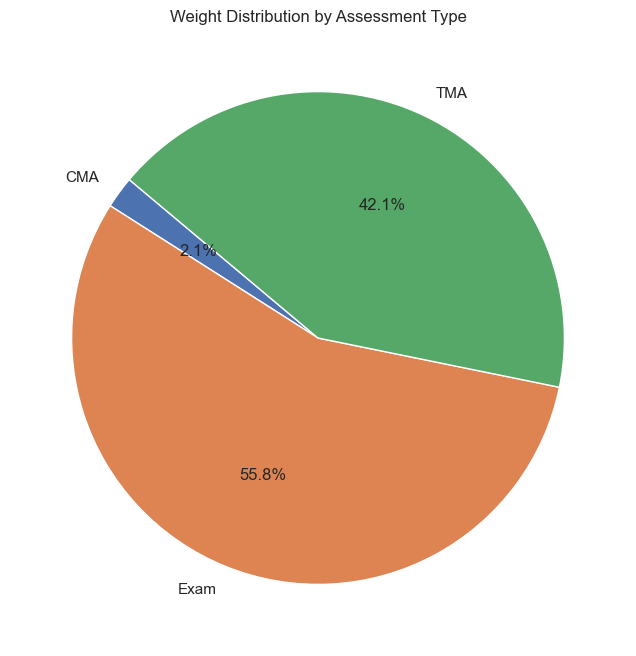

In [194]:
assessment_weights = assesments.groupby('assessment_type')['weight'].sum().reset_index()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(assessment_weights['weight'], labels=assessment_weights['assessment_type'], autopct='%1.1f%%', startangle=140)
plt.title('Weight Distribution by Assessment Type')
plt.show()

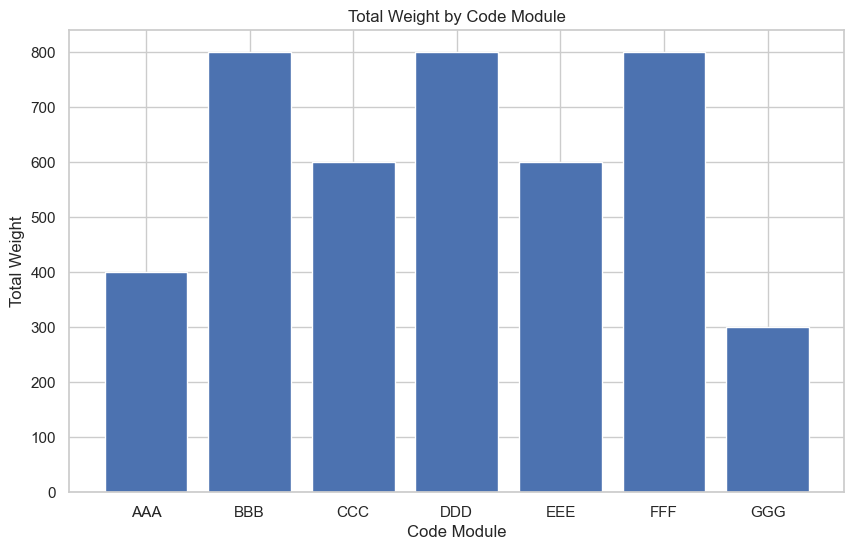

In [195]:
module_weights = assesments.groupby('code_module')['weight'].sum().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(module_weights['code_module'], module_weights['weight'])
plt.xlabel('Code Module')
plt.ylabel('Total Weight')
plt.title('Total Weight by Code Module')
plt.show()

# "Courses" data

## deskripsi dasar

In [196]:
courses = pd.read_csv('courses.csv')
courses.head()

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


In [197]:
courses.shape

(22, 3)

## deskripsi mendalam dari tiap records

In [198]:
courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 656.0+ bytes


In [199]:
courses.describe()

,module_presentation_length
count,22.000000
mean,255.545455
std,13.654677
min,234.000000
25%,241.000000
50%,261.500000
75%,268.000000
max,269.000000


In [200]:
courses.isnull().sum()

code_module                   0
code_presentation             0
module_presentation_length    0
dtype: int64

## statistik deskriptif berdasarkan code module

In [201]:
grouped_stats = courses.groupby('code_module')['module_presentation_length']
grouped_stats.describe()


,count,mean,std,min,25%,50%,75%,max
code_module,,,,,,,,
AAA,2.0,268.500000,0.707107,268.0,268.25,268.5,268.75,269.0
BBB,4.0,251.000000,16.532796,234.0,238.50,251.0,263.50,268.0
CCC,2.0,255.000000,19.798990,241.0,248.00,255.0,262.00,269.0
DDD,4.0,251.000000,12.138094,240.0,240.75,251.0,261.25,262.0
EEE,3.0,259.333333,15.885003,241.0,254.50,268.0,268.50,269.0
FFF,4.0,254.500000,16.176114,240.0,240.75,254.5,268.25,269.0
GGG,3.0,257.000000,14.422205,241.0,251.00,261.0,265.00,269.0


## visualisasi data untuk presentation length

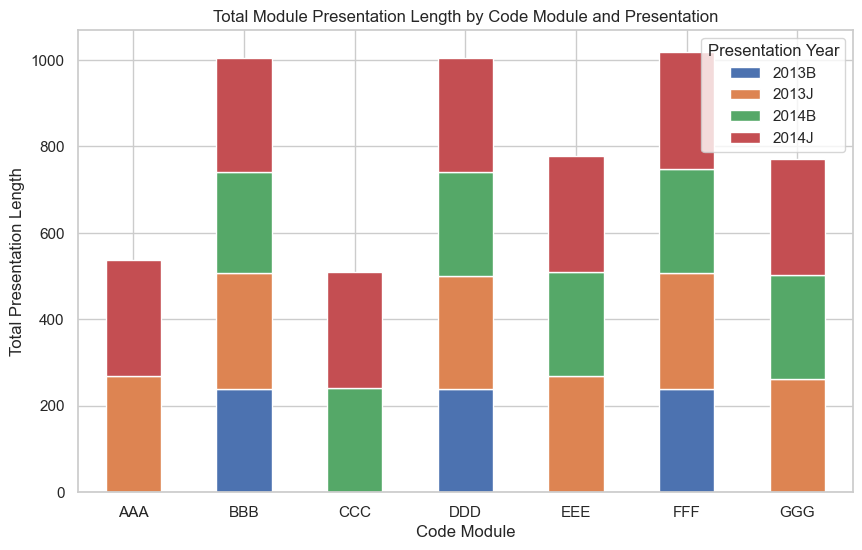

In [202]:
grouped_data = courses.groupby(['code_module', 'code_presentation'])['module_presentation_length'].sum().unstack()

ax = grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Code Module')
plt.ylabel('Total Presentation Length')
plt.title('Total Module Presentation Length by Code Module and Presentation')
plt.xticks(rotation=0)
plt.legend(title='Presentation Year')
plt.show()

# "studentAssessment" data

In [203]:
studentAssessment = pd.read_csv('studentAssessment.csv')
studentAssessment.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [204]:
studentAssessment.shape

(173912, 5)

In [205]:
studentAssessment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  int64  
 1   id_student      173912 non-null  int64  
 2   date_submitted  173912 non-null  int64  
 3   is_banked       173912 non-null  int64  
 4   score           173739 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 6.6 MB


In [206]:
studentAssessment.describe()

,id_assessment,id_student,date_submitted,is_banked,score
count,173912.000000,1.739120e+05,173912.000000,173912.000000,173739.000000
mean,26553.803556,7.051507e+05,116.032942,0.010977,75.799573
std,8829.784254,5.523952e+05,71.484148,0.104194,18.798107
min,1752.000000,6.516000e+03,-11.000000,0.000000,0.000000
25%,15022.000000,5.044290e+05,51.000000,0.000000,65.000000
50%,25359.000000,5.852080e+05,116.000000,0.000000,80.000000
75%,34883.000000,6.344980e+05,173.000000,0.000000,90.000000
max,37443.000000,2.698588e+06,608.000000,1.000000,100.000000


In [207]:
studentAssessment.isnull().sum()

id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64

## penghapusan null value pada data score

In [208]:
studentAssessment.dropna(inplace=True)

## visualisasi untuk mengetahui distribusi data score

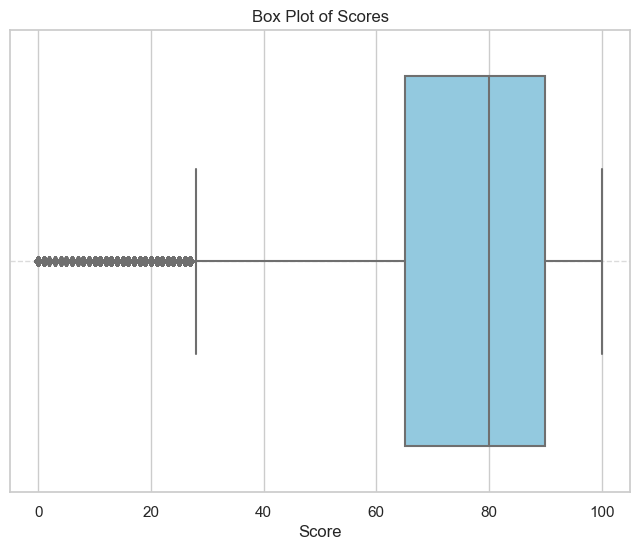

In [209]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=studentAssessment, x='score', color='skyblue')
plt.xlabel('Score')
plt.title('Box Plot of Scores')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## visualisasi untuk mengetahui korelasi antar kolom

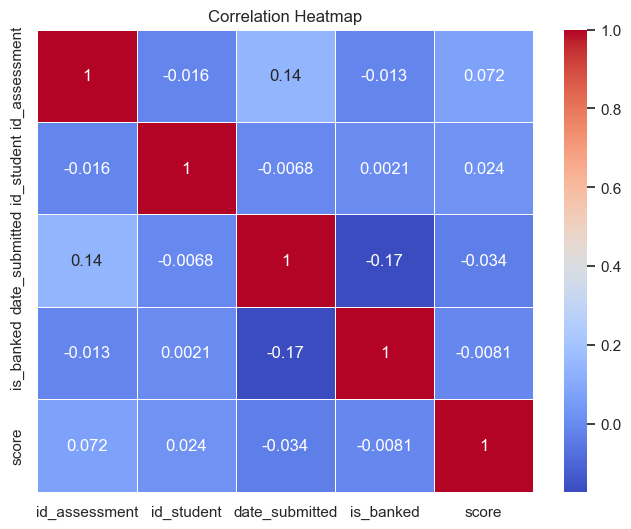

In [210]:
correlation_matrix = studentAssessment.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

## visualisasi untuk mengetahui distribusi data kolom is_banked

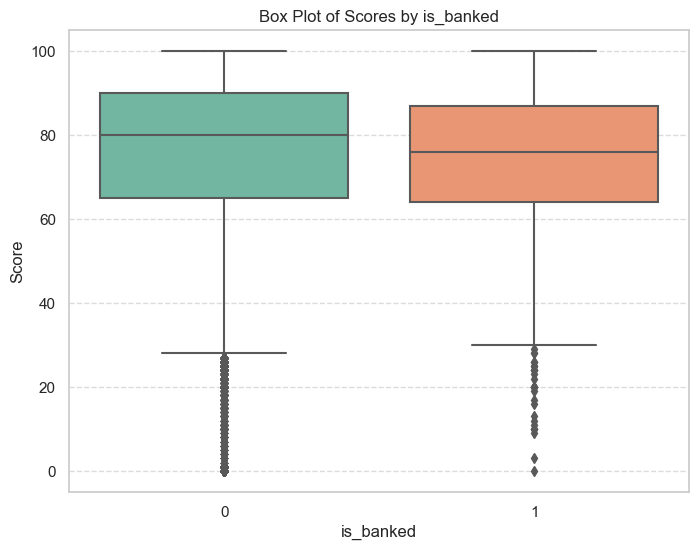

In [211]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=studentAssessment, x='is_banked', y='score', palette='Set2')
plt.xlabel('is_banked')
plt.ylabel('Score')
plt.title('Box Plot of Scores by is_banked')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## visualisasi untuk jumlah pengumpulan berdasarkan id_assessment

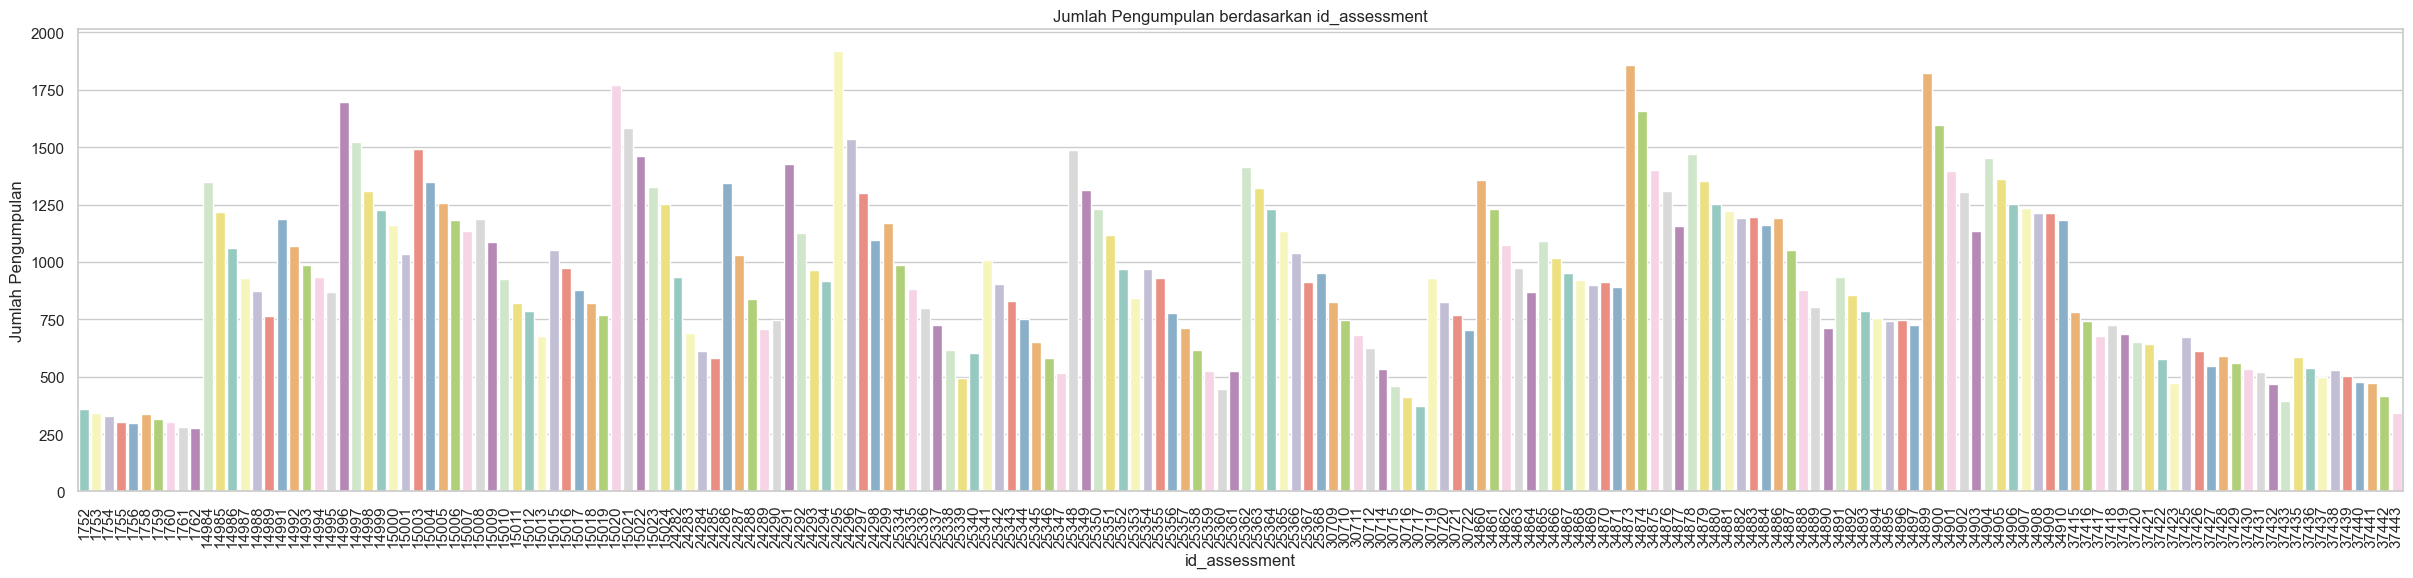

In [212]:
plt.figure(figsize=(30, 6))
sns.countplot(x='id_assessment', data=studentAssessment, palette='Set3')
plt.title('Jumlah Pengumpulan berdasarkan id_assessment')
plt.xlabel('id_assessment')
plt.ylabel('Jumlah Pengumpulan')
plt.xticks(rotation=90)
plt.show()

## visualisasi untuk hubungan antara date_submitted dan score

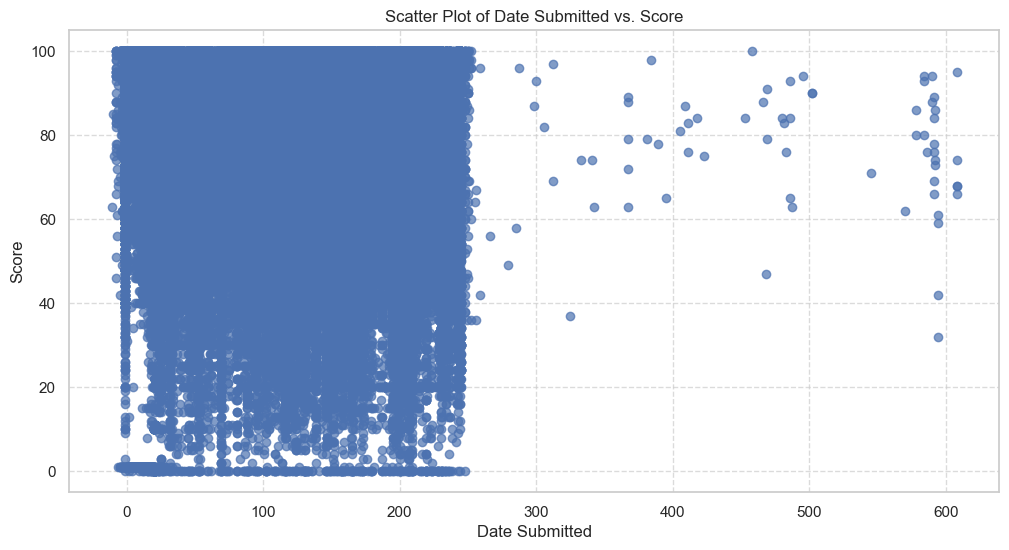

In [213]:
plt.figure(figsize=(12, 6))
plt.scatter(studentAssessment['date_submitted'], studentAssessment['score'], alpha=0.7)
plt.xlabel('Date Submitted')
plt.ylabel('Score')
plt.title('Scatter Plot of Date Submitted vs. Score')
plt.grid(linestyle='--', alpha=0.7)
plt.show()

# "studentInfo" data

## deskripsi dasar

In [214]:
studentInfo = pd.read_csv('studentInfo.csv')
studentInfo.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [215]:
studentInfo.shape

(32593, 12)

## deskripsi mendalam dari data

In [216]:
studentInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


In [217]:
studentInfo.describe()

,id_student,num_of_prev_attempts,studied_credits
count,3.259300e+04,32593.000000,32593.000000
mean,7.066877e+05,0.163225,79.758691
std,5.491673e+05,0.479758,41.071900
min,3.733000e+03,0.000000,30.000000
25%,5.085730e+05,0.000000,60.000000
50%,5.903100e+05,0.000000,60.000000
75%,6.444530e+05,0.000000,120.000000
max,2.716795e+06,6.000000,655.000000


In [218]:
studentInfo.isnull().sum()

code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64

## pemberian nilai dengan 0 pada data yang NaN

In [219]:
studentInfo['imd_band'].fillna(0, inplace=True)

## visualisasi atas distribusi jenis kelamin pada siswa

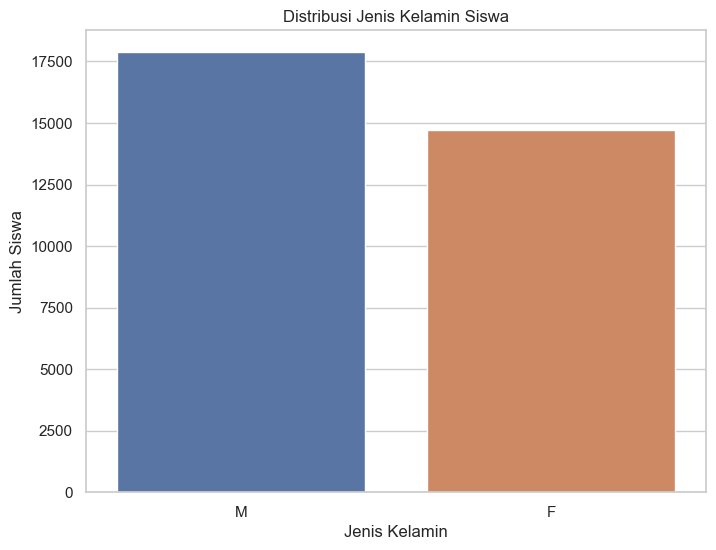

In [220]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x="gender", data=studentInfo)
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah Siswa')
plt.title('Distribusi Jenis Kelamin Siswa')
plt.show()

## visualisasi atas distribusi hasil akhir siswa

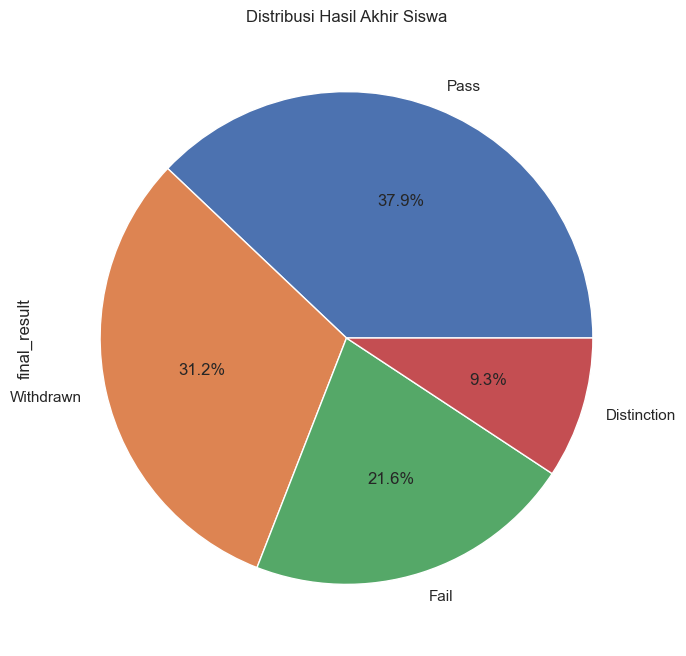

In [221]:
plt.figure(figsize=(10, 8))
studentInfo['final_result'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribusi Hasil Akhir Siswa')
plt.show()

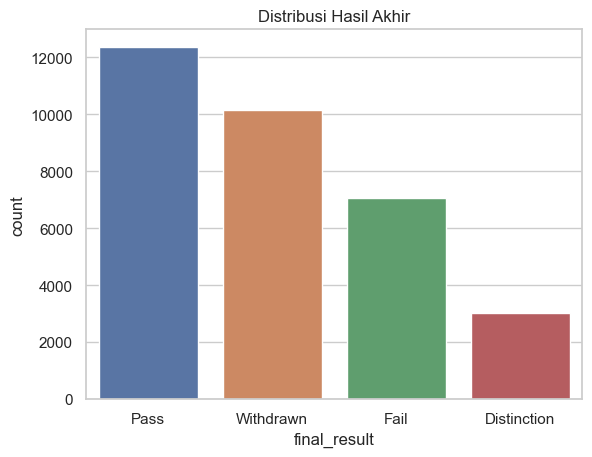

In [222]:
sns.countplot(x='final_result', data=studentInfo)
plt.title('Distribusi Hasil Akhir')
plt.show()

## visualisasi atas distribusi usia

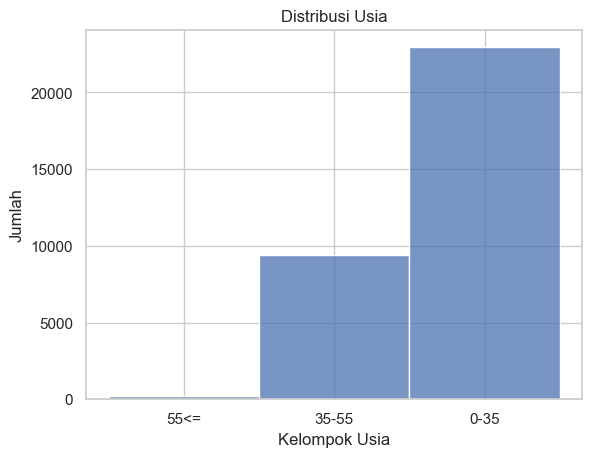

In [223]:
sns.histplot(studentInfo['age_band'], bins=5)
plt.title('Distribusi Usia')
plt.xlabel('Kelompok Usia')
plt.ylabel('Jumlah')
plt.show()


## visualisasi atas distribusi pendidikan tertinggi berdasarkan hasil akhir

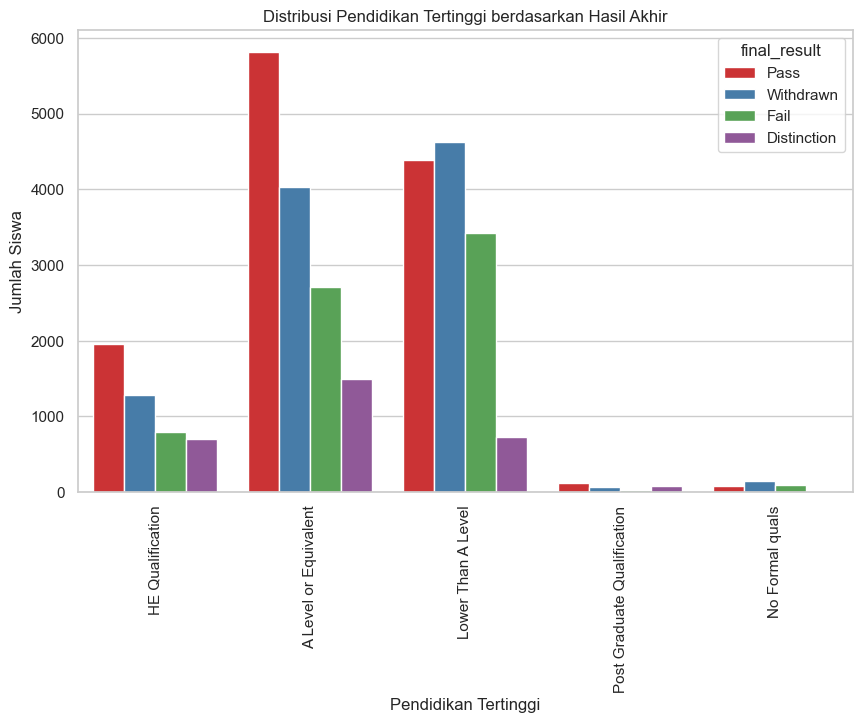

In [224]:
plt.figure(figsize=(10, 6))
sns.countplot(x='highest_education', data=studentInfo, hue='final_result', palette='Set1')
plt.xticks(rotation=90)
plt.xlabel('Pendidikan Tertinggi')
plt.ylabel('Jumlah Siswa')
plt.title('Distribusi Pendidikan Tertinggi berdasarkan Hasil Akhir')
plt.show()

## visualisasi atas distribusi region para siswa

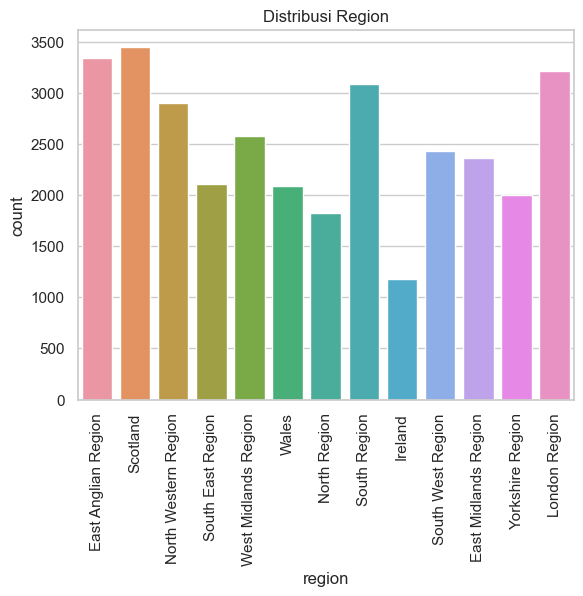

In [225]:
sns.countplot(x='region', data=studentInfo)
plt.title('Distribusi Region')
plt.xticks(rotation=90)
plt.show()

## distribusi korelasi antar kolom

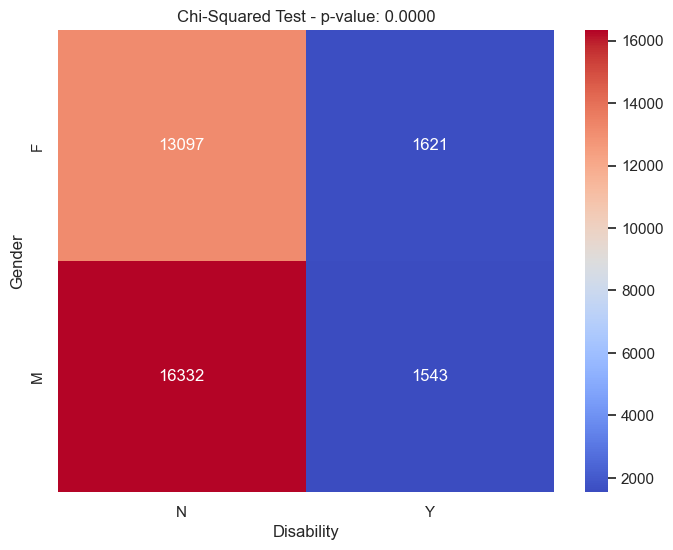

In [226]:
# Membuat tabel kontingensi untuk uji chi-squared
contingency_table = pd.crosstab(studentInfo['gender'], studentInfo['disability'])

# Menghitung statistik chi-squared
chi2, p, _, _ = chi2_contingency(contingency_table)

# Membuat heatmap untuk korelasi antar kolom kategorikal
plt.figure(figsize=(8, 6))
sns.heatmap(pd.crosstab(studentInfo['gender'], studentInfo['disability']), annot=True, cmap='coolwarm', fmt='d')
plt.xlabel('Disability')
plt.ylabel('Gender')
plt.title(f'Chi-Squared Test - p-value: {p:.4f}')
plt.show()

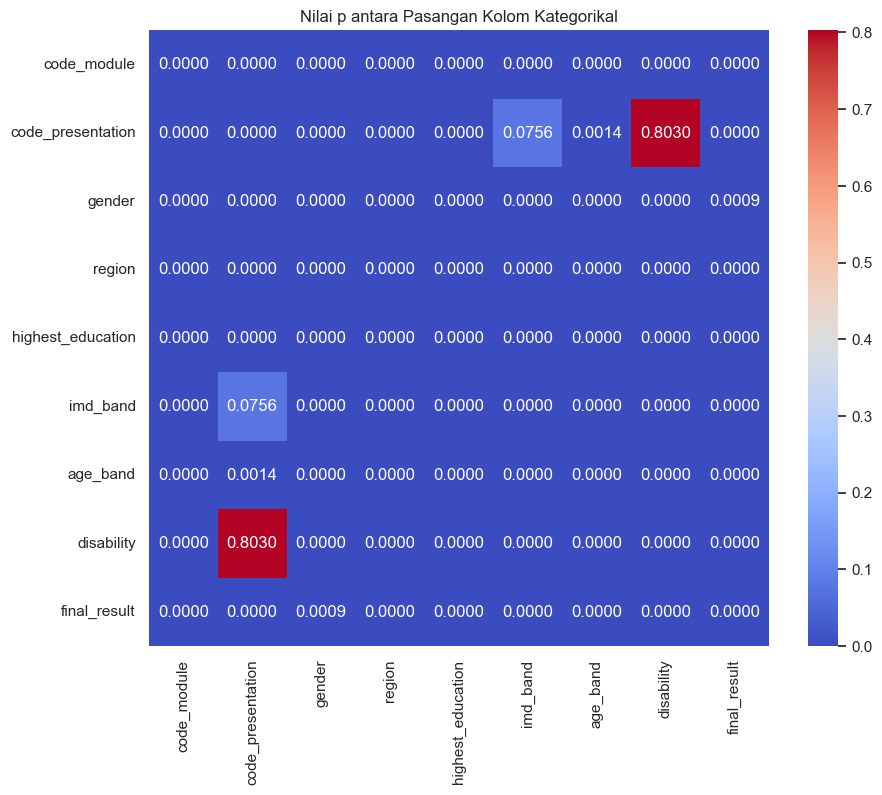

In [227]:
# Matriks kosong untuk menyimpan nilai p
p_values = []

# Mengisi matriks dengan nilai p dari uji chi-squared
columns = studentInfo.select_dtypes(include='object').columns  # Kolom kategorikal
for col1 in columns:
    row_p_values = []
    for col2 in columns:
        contingency_table = pd.crosstab(studentInfo[col1], studentInfo[col2])
        _, p, _, _ = chi2_contingency(contingency_table)
        row_p_values.append(p)
    p_values.append(row_p_values)

# Membuat DataFrame dari matriks p
p_df = pd.DataFrame(p_values, columns=columns, index=columns)

# Membuat heatmap dari nilai p
plt.figure(figsize=(10, 8))
sns.heatmap(p_df, annot=True, cmap='coolwarm', fmt='.4f')
plt.title('Nilai p antara Pasangan Kolom Kategorikal')
plt.show()

## visualisasi atas hubungan antara studied credits dan juga final results

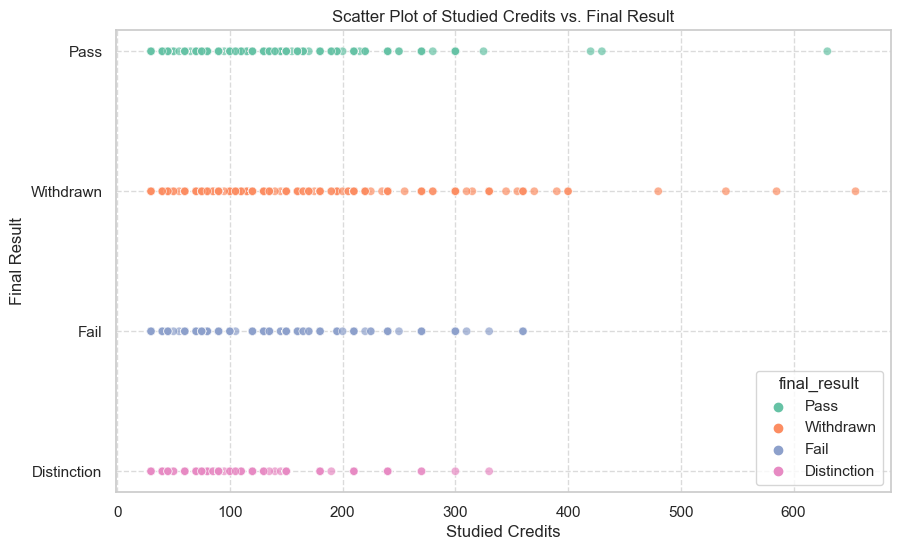

In [228]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=studentInfo, x='studied_credits', y='final_result', hue='final_result', palette='Set2', alpha=0.7)
plt.xlabel('Studied Credits')
plt.ylabel('Final Result')
plt.title('Scatter Plot of Studied Credits vs. Final Result')
plt.grid(linestyle='--', alpha=0.7)
plt.show()

# "studentRegistration" data

## deskripsi dasar

In [229]:
studentRegistration = pd.read_csv('studentRegistration.csv')
studentRegistration.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


In [230]:
studentRegistration.shape

(32593, 5)

## deskripsi mendalam per kolom

In [231]:
studentRegistration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_module          32593 non-null  object 
 1   code_presentation    32593 non-null  object 
 2   id_student           32593 non-null  int64  
 3   date_registration    32548 non-null  float64
 4   date_unregistration  10072 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


In [232]:
studentRegistration.describe()

,id_student,date_registration,date_unregistration
count,3.259300e+04,32548.000000,10072.000000
mean,7.066877e+05,-69.411300,49.757645
std,5.491673e+05,49.260522,82.460890
min,3.733000e+03,-322.000000,-365.000000
25%,5.085730e+05,-100.000000,-2.000000
50%,5.903100e+05,-57.000000,27.000000
75%,6.444530e+05,-29.000000,109.000000
max,2.716795e+06,167.000000,444.000000


In [233]:
studentRegistration.isnull().sum()

code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64

## Mengganti nilai yang hilang dengan rata-rata kolom date_registration

In [234]:
mean_date_registration = studentRegistration['date_registration'].mean()
studentRegistration['date_registration'].fillna(mean_date_registration, inplace=True)


## Mengganti nilai yang hilang dengan median kolom date_unregistration

In [235]:
median_date_unregistration = studentRegistration['date_unregistration'].median()
studentRegistration['date_unregistration'].fillna(median_date_unregistration, inplace=True)

##  visualisasi berdasarkan tanggal pendaftaran (date_registration) dan tanggal pembatalan pendaftaran (date_unregistration) 

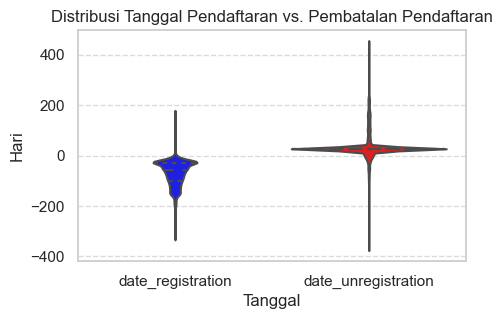

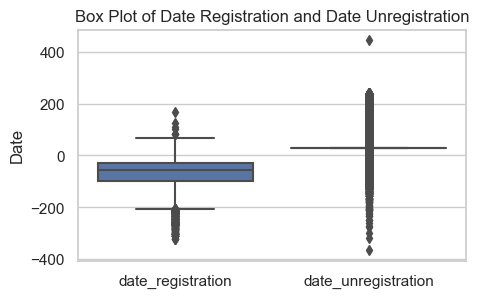

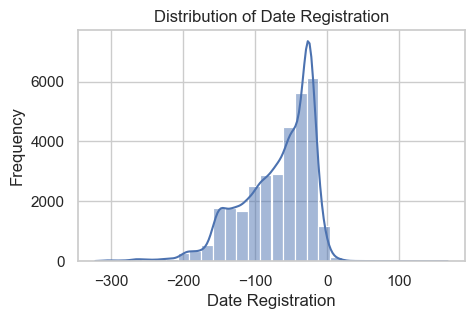

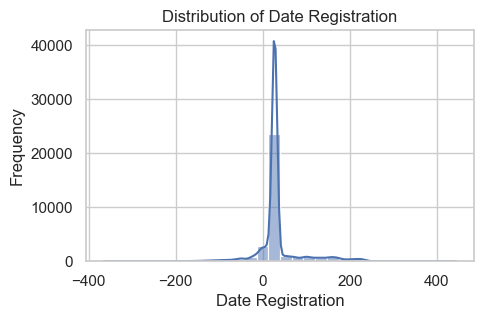

In [236]:
plt.figure(figsize=(5, 3))
sns.violinplot(data=studentRegistration[['date_registration', 'date_unregistration']], palette=['blue', 'red'], inner='quart')
plt.xlabel('Tanggal')
plt.ylabel('Hari')
plt.title('Distribusi Tanggal Pendaftaran vs. Pembatalan Pendaftaran')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(5, 3))
sns.boxplot(data=studentRegistration[['date_registration', 'date_unregistration']], orient='vertical')
plt.ylabel('Date')
plt.title('Box Plot of Date Registration and Date Unregistration')
plt.show()

plt.figure(figsize=(5, 3))
sns.histplot(studentRegistration['date_registration'], bins=30, kde=True)
plt.xlabel('Date Registration')
plt.ylabel('Frequency')
plt.title('Distribution of Date Registration')
plt.show()

plt.figure(figsize=(5, 3))
sns.histplot(studentRegistration['date_unregistration'], bins=30, kde=True)
plt.xlabel('Date Registration')
plt.ylabel('Frequency')
plt.title('Distribution of Date Registration')
plt.show()

## visualisasi untuk korelasi antar kolom numerik

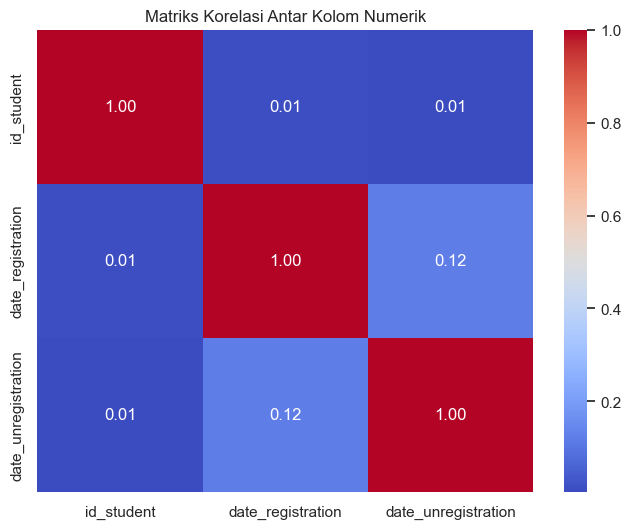

In [237]:
correlation_matrix = studentRegistration.corr()

# Membuat heatmap dari matriks korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi Antar Kolom Numerik')
plt.show()

# "studentVle" data

## deskripsi dasar

In [238]:
studentVle = pd.read_csv('studentVle.csv')
studentVle.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


In [239]:
studentVle.shape

(10655280, 6)

## deskripsi mendalam per kolom

In [240]:
studentVle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10655280 entries, 0 to 10655279
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   code_module        object
 1   code_presentation  object
 2   id_student         int64 
 3   id_site            int64 
 4   date               int64 
 5   sum_click          int64 
dtypes: int64(4), object(2)
memory usage: 487.8+ MB


In [241]:
studentVle.describe()

,id_student,id_site,date,sum_click
count,1.065528e+07,1.065528e+07,1.065528e+07,1.065528e+07
mean,7.333336e+05,7.383234e+05,9.517400e+01,3.716946e+00
std,5.827060e+05,1.312196e+05,7.607130e+01,8.849047e+00
min,6.516000e+03,5.267210e+05,-2.500000e+01,1.000000e+00
25%,5.077430e+05,6.735190e+05,2.500000e+01,1.000000e+00
50%,5.882360e+05,7.300690e+05,8.600000e+01,2.000000e+00
75%,6.464840e+05,8.770300e+05,1.560000e+02,3.000000e+00
max,2.698588e+06,1.049562e+06,2.690000e+02,6.977000e+03


In [242]:
studentVle.isnull().sum()

code_module          0
code_presentation    0
id_student           0
id_site              0
date                 0
sum_click            0
dtype: int64

## visualisasi jumlah klik per id student

In [243]:
studentVle['sum_click'] = pd.to_numeric(studentVle['sum_click'], errors='coerce')

clicks_per_student = studentVle.groupby('id_student')['sum_click'].sum()

plt.figure(figsize=(10, 6))
clicks_per_student.plot(kind='bar')
plt.xlabel('Student ID')
plt.ylabel('Total Sum of Clicks')
plt.title('Total Sum of Clicks per Student')
plt.show()

KeyboardInterrupt: 

## Visualisasi hubungan antara "sum_click" dan "date"

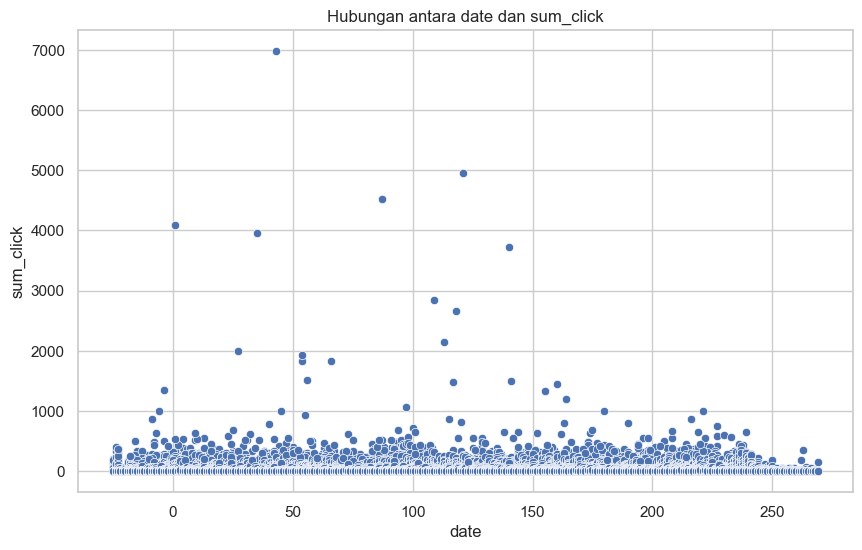

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=studentVle, x="date", y="sum_click")
plt.title("Hubungan antara date dan sum_click")
plt.xlabel("date")
plt.ylabel("sum_click")
plt.show()

## Visualisasi hubungan antara "sum_click" dan "code_module"

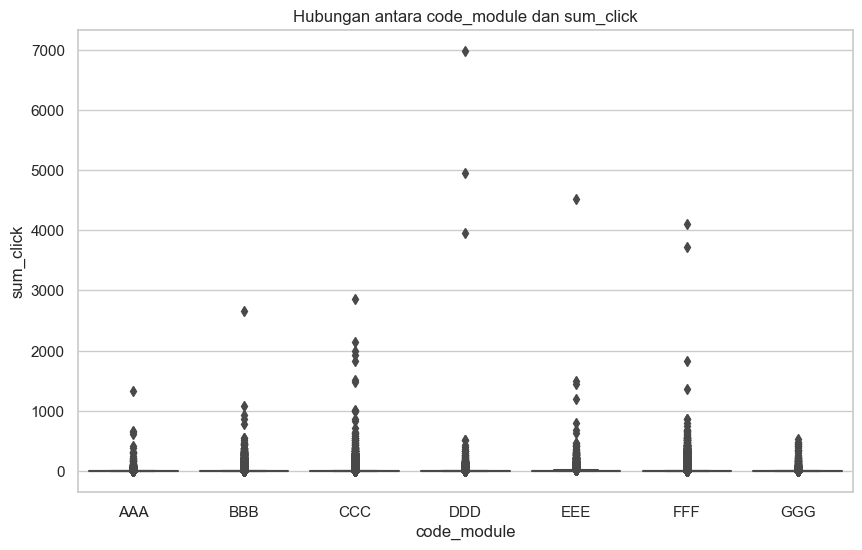

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=studentVle, x="code_module", y="sum_click")
plt.title("Hubungan antara code_module dan sum_click")
plt.xlabel("code_module")
plt.ylabel("sum_click")
plt.show()

## visualisasi Distribusi sum_click per code_presentation

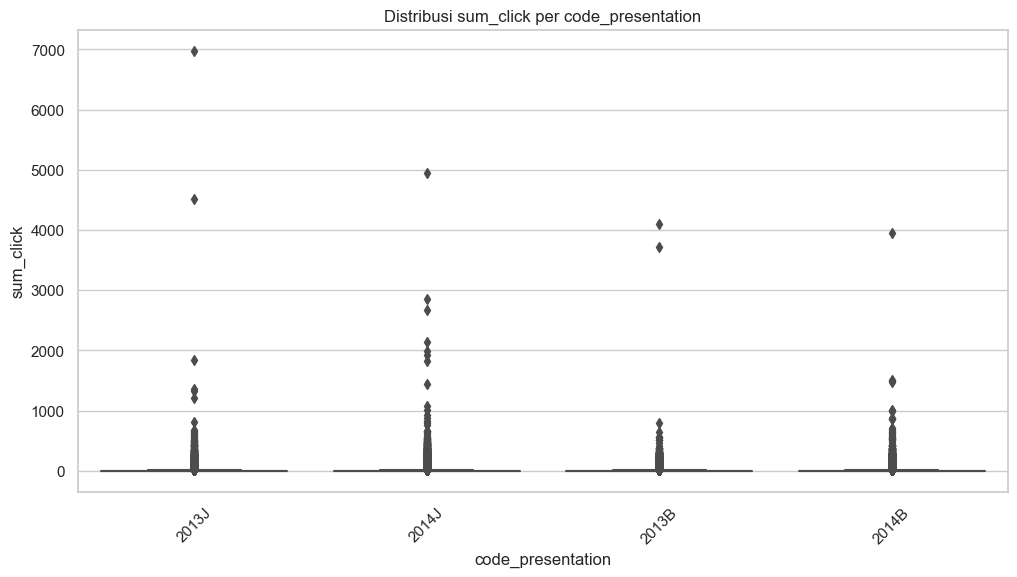

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=studentVle, x="code_presentation", y="sum_click")
plt.title("Distribusi sum_click per code_presentation")
plt.xlabel("code_presentation")
plt.ylabel("sum_click")
plt.xticks(rotation=45)
plt.show()

# "vle" data

## deskripsi dasar

In [ ]:
vle = pd.read_csv('vle.csv')
vle.head()

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


In [ ]:
vle.shape

(6364, 6)

## deskripsi mendalam per kolom

In [ ]:
vle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_site            6364 non-null   int64  
 1   code_module        6364 non-null   object 
 2   code_presentation  6364 non-null   object 
 3   activity_type      6364 non-null   object 
 4   week_from          1121 non-null   float64
 5   week_to            1121 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 298.4+ KB


In [ ]:
vle.describe()

,id_site,week_from,week_to
count,6.364000e+03,1121.000000,1121.000000
mean,7.260991e+05,15.204282,15.214987
std,1.283151e+05,8.792865,8.779806
min,5.267210e+05,0.000000,0.000000
25%,6.615928e+05,8.000000,8.000000
50%,7.300965e+05,15.000000,15.000000
75%,8.140162e+05,22.000000,22.000000
max,1.077905e+06,29.000000,29.000000


In [ ]:
vle.isnull().sum()

id_site                 0
code_module             0
code_presentation       0
activity_type           0
week_from            5243
week_to              5243
dtype: int64

## Mengganti nilai yang hilang dengan rata-rata kolom

In [ ]:
vle['week_from'].fillna(vle['week_from'].mean(), inplace=True)
vle['week_to'].fillna(vle['week_to'].mean(), inplace=True)


## visualisasi "week_from" dan "week_to" 

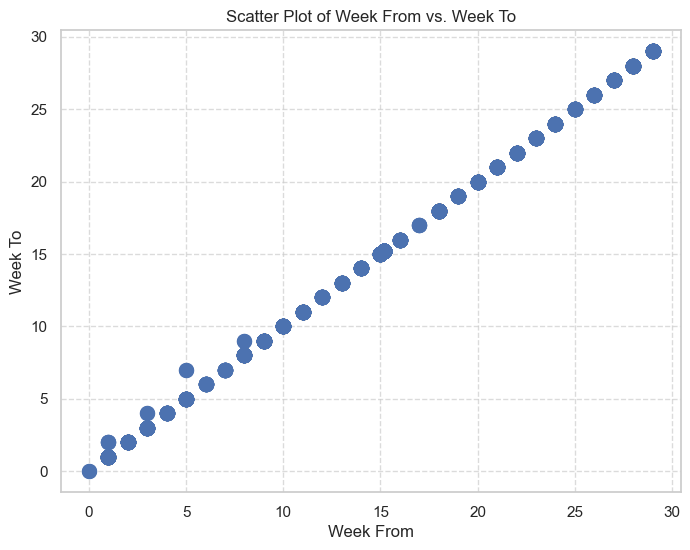

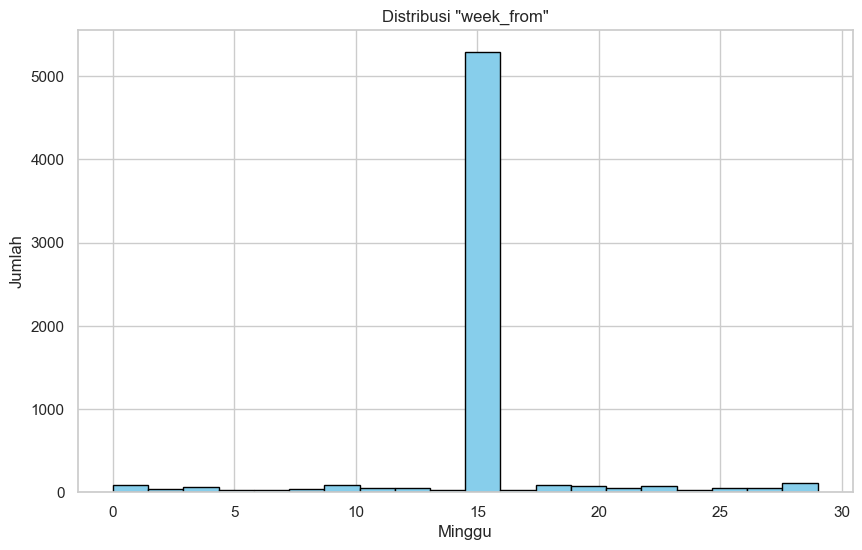

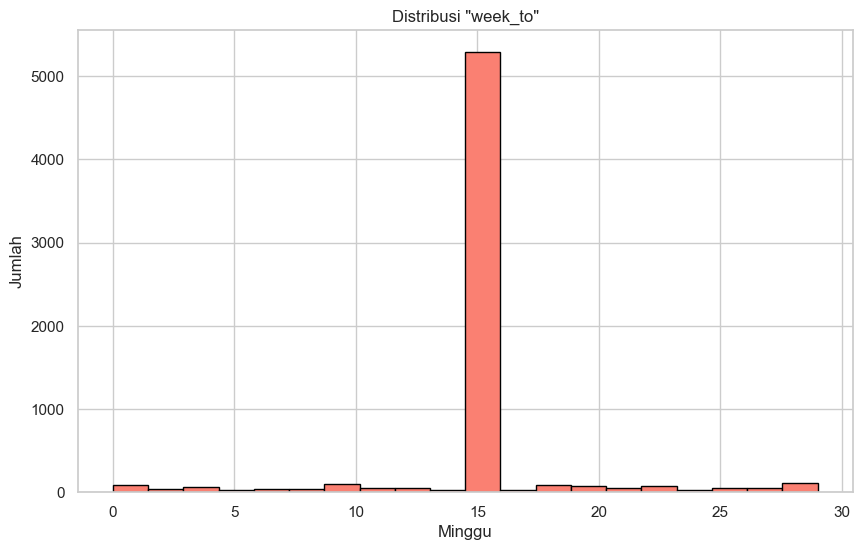

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(vle['week_from'], vle['week_to'], marker='o', s=100)
plt.xlabel('Week From')
plt.ylabel('Week To')
plt.title('Scatter Plot of Week From vs. Week To')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Konversi kolom "week_from" dan "week_to" menjadi tipe data numerik (jika belum)
vle['week_from'] = pd.to_numeric(vle['week_from'], errors='coerce')
vle['week_to'] = pd.to_numeric(vle['week_to'], errors='coerce')

# Visualisasi distribusi "week_from"
plt.figure(figsize=(10, 6))
plt.hist(vle['week_from'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Distribusi "week_from"')
plt.xlabel('Minggu')
plt.ylabel('Jumlah')
plt.grid(True)
plt.show()

# Visualisasi distribusi "week_to"
plt.figure(figsize=(10, 6))
plt.hist(vle['week_to'].dropna(), bins=20, color='salmon', edgecolor='black')
plt.title('Distribusi "week_to"')
plt.xlabel('Minggu')
plt.ylabel('Jumlah')
plt.grid(True)
plt.show()


## Plot jumlah aktivitas berdasarkan jenis aktivitas

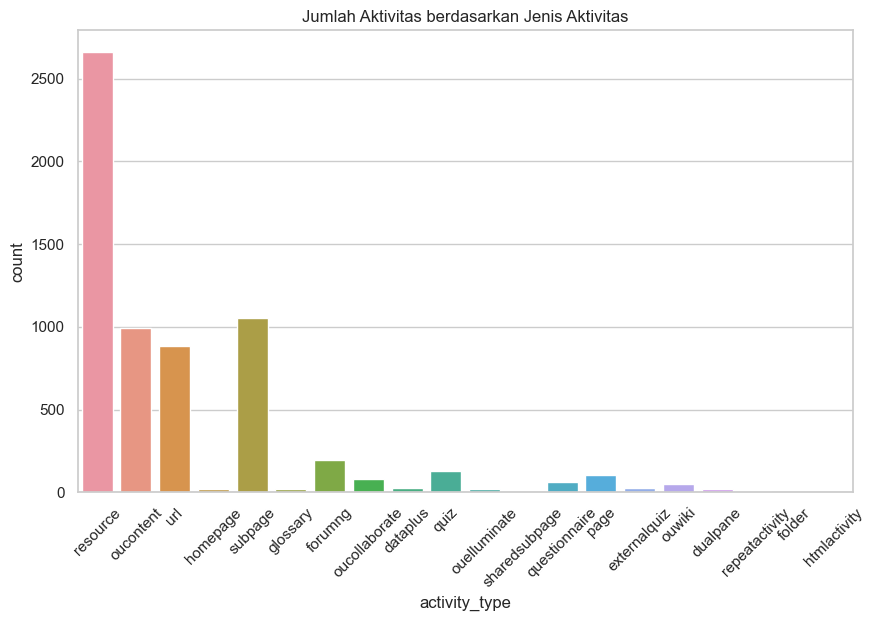

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=vle, x='activity_type')
plt.title('Jumlah Aktivitas berdasarkan Jenis Aktivitas')
plt.xticks(rotation=45)
plt.show()


## visualisasi untuk jenis modul kode dan jenis presentasi kode

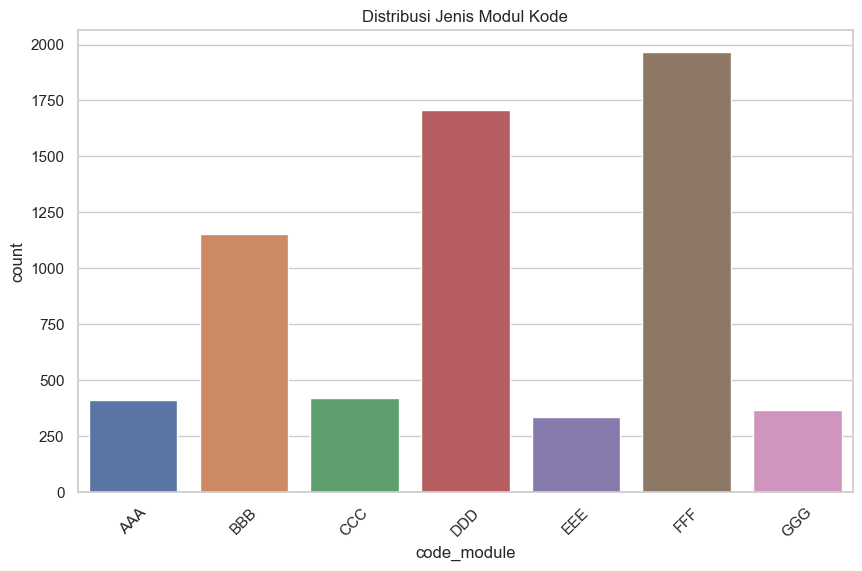

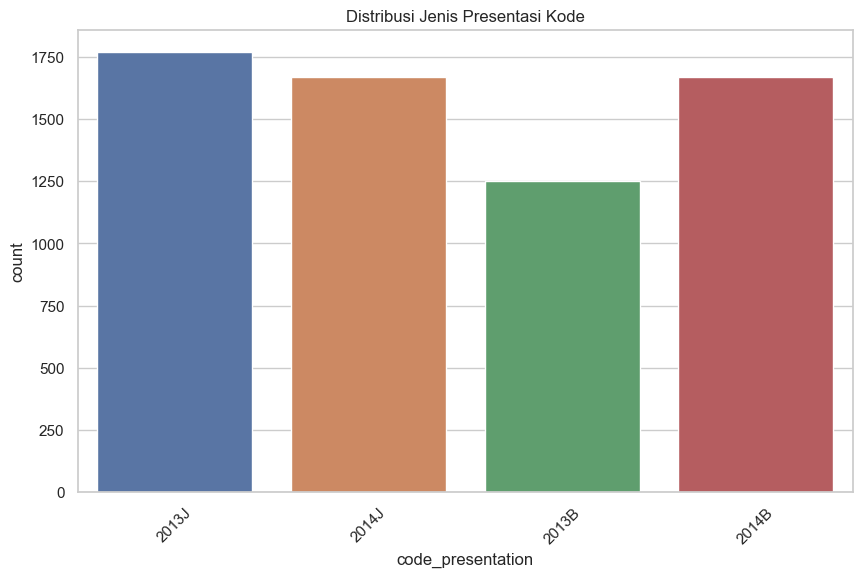

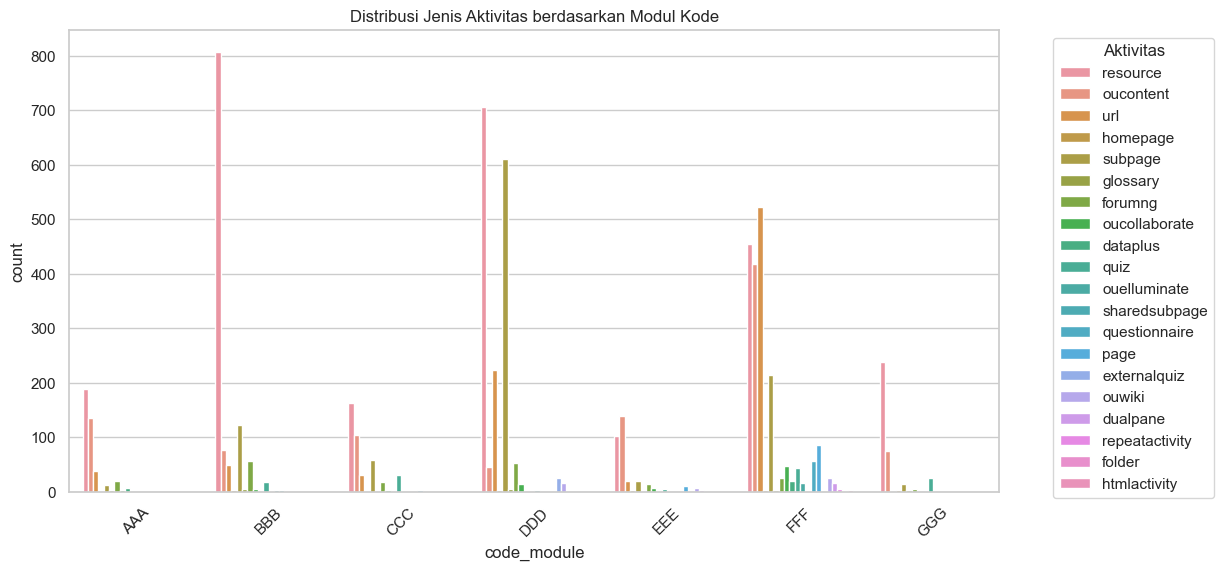

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=vle, x='code_module')
plt.title('Distribusi Jenis Modul Kode')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=vle, x='code_presentation')
plt.title('Distribusi Jenis Presentasi Kode')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(12, 6))
sns.countplot(data=vle, x='code_module', hue='activity_type')
plt.title('Distribusi Jenis Aktivitas berdasarkan Modul Kode')
plt.xticks(rotation=45)
plt.legend(title='Aktivitas', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



# Korelasi antar csv

In [ ]:
df1 = assesments
df2 = courses
df3 = studentAssessment
df4 = studentInfo
df5 = studentRegistration
df6 = studentVle
df7 = vle

combined_df = pd.concat([df1, df2, df3, df4, df5, df6, df7], ignore_index=True)


In [ ]:
correlation_matrix = combined_df.corr()

plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Korelasi')
plt.title('Matriks Korelasi')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()


# preprocess all csv

## Membuat feature baru yaitu "Module" buat menggabungkan antara feature 'code_module' dengan 'code_presentation'

In [ ]:
assesments['module_presentation'] = list(map(lambda a,b: str(a) + '_' + str(b), assesments.code_module, assesments.code_presentation))
courses['module_presentation'] = list(map(lambda a,b: str(a) + '_' + str(b), courses.code_module, courses.code_presentation))
studentInfo['module_presentation'] = list(map(lambda a,b: str(a) + '_' + str(b), studentInfo.code_module, studentInfo.code_presentation))
studentRegistration['module_presentation'] = list(map(lambda a,b: str(a) + '_' + str(b), studentRegistration.code_module, studentRegistration.code_presentation))
vle['module_presentation'] = list(map(lambda a,b: str(a)+ '_' + str(b), vle.code_module, vle.code_presentation))

## Pemeriksaan konsistensi data dengan feature final_result pada entitas studentInfo


In [ ]:
var_temp = studentRegistration.loc[studentRegistration.date_unregistration.notna(),['id_student', 'module_presentation', 'date_unregistration']]

var_temp = pd.merge(studentInfo, var_temp, on=['id_student', 'module_presentation'])

## Menampilkan student yang unregistration tanpa tanda "Withdrawn" pada feature final_result

In [ ]:
err_final_result = var_temp.loc[var_temp.final_result != 'Withdrawn']
incorrect_final_results = err_final_result.index
err_final_result

## Menampilkan student yang unregistration tanpa tanda "Withdrawn" pada feature final_result

In [244]:
err_final_result = var_temp.loc[var_temp.final_result != 'Withdrawn']
incorrect_final_results = err_final_result.index
err_final_result

NameError: name 'var_temp' is not defined

## Melakukan proses input 'Withdrawn' pada student yang tidak ada label 'Withdrawn'

In [ ]:
for row in err_final_result[['id_student','code_module','code_presentation']].values:
    studentInfo.loc[(studentInfo.id_student==row[0])&(studentInfo.code_module==row[1])&(studentInfo.code_presentation==row[2]), 'final_result'] = 'Withdrawn'

## Melakukan proses pengecekkan weight pada penilaian dan module presentation

In [ ]:
grouped_assessments = assesments.groupby(['code_module', 'code_presentation']).agg(total_weight = ('weight', sum))
grouped_assessments.reset_index(inplace=True)
grouped_assessments

## Group by specified columns and aggregate the sum of 'weight' as 'type_weights'

In [ ]:
filtered_assessments = assesments[(assesments['code_module'].isin(["CCC", "GGG"]))]
grouped_assessments = filtered_assessments.groupby(['code_module', 'code_presentation', 'assessment_type']) \
    .agg(type_weights=('weight', 'sum'))


## Reset index to make the DataFrame more readable


In [ ]:
grouped_assessments.reset_index(inplace=True)

grouped_assessments

## Weight Exam dibagi 2 untuk modul CCC


In [ ]:
assesments.loc[(assesments['code_module'] == 'CCC') & (assesments['assessment_type'] == 'Exam'), 'weight'] /= 2

## Weight penilain TMA diupdate sebesar 100%



In [ ]:
assesments.loc[(assesments['code_module'] == 'GGG') & (assesments['assessment_type'] == 'TMA'), 'weight'] = 100 / 3

## Merge the two tables on 'id_assessment' and calculate 'score*weight'


In [245]:
merged_table = pd.merge(studentAssessment, assesments, on='id_assessment', how='left')
merged_table['score*weight'] = (merged_table['score'] * merged_table['weight'])

## Group by specified columns and aggregate sum of 'score*weight' and 'weight'

In [ ]:
grouped_marks = merged_table.groupby(['id_student', 'code_module', 'code_presentation'], as_index=False)[['score*weight', 'weight']].sum()

## Calculate adjusted_mark and mark


In [ ]:
grouped_marks['adjusted_mark'] = grouped_marks['score*weight'] / grouped_marks['weight']
grouped_marks['mark'] = grouped_marks['score*weight'] / 200


## Rename columns


In [ ]:
grouped_marks.rename(columns={'total_score_weight': 'total_score*weight',
                              'weight': 'attempted_weight'}, inplace=True)


## Round off values


In [ ]:
grouped_marks = grouped_marks.round(1)


## Merge marks and info_student to obtain a larger table with relevant information


In [ ]:
merged_table = pd.merge(grouped_marks, studentInfo, on=['id_student', 'code_module', 'code_presentation'], how='left')


## Replace mark and adjusted_mark with NaN for rows where final_result is 'Withdrawn'



In [ ]:
merged_table.loc[merged_table.final_result=='Withdrawn','mark']= np.nan
merged_table.loc[merged_table.final_result=='Withdrawn','adjusted_mark']= np.nan

## Categories based on final_result

In [ ]:
distinction = merged_table[merged_table.final_result == "Distinction"].index
passing = merged_table[merged_table.final_result == "Pass"].index
fail = merged_table[merged_table.final_result == "Fail"].index
withdraw = merged_table[merged_table.final_result == "Withdraw"].index


## Categories based on attempted_weight


In [ ]:
attempt_weight200 = merged_table[merged_table.attempted_weight == 200].index
attempt_weight150_200 = merged_table[(merged_table.attempted_weight >= 150) & (merged_table.attempted_weight != 200)].index
attempt_weight0_150 = merged_table.index.difference(attempt_weight200).difference(attempt_weight150_200)


## Categories based on adjusted_mark


In [ ]:
adj_mark80_100 = merged_table[merged_table.attempted_weight >= 80].index
adj_mark70_80 = merged_table[(merged_table.attempted_weight >= 70) & (merged_table.attempted_weight < 80)].index
adj_mark0_70 = merged_table[merged_table.attempted_weight < 70].index


## Categories based on mark


In [ ]:
mark40_100 = merged_table[merged_table.attempted_weight >= 40].index
mark0_40 = merged_table[merged_table.attempted_weight < 40].index

print("Shape of merged_table:", merged_table.shape)



## Get common indices for Distinction



In [ ]:
distinction_indices = list(set(attempt_weight200).intersection(adj_mark80_100))
merged_table.loc[distinction_indices, "final_result"] = "Distinction"


## Get common indices for Pass



In [ ]:
pass_indices = list(set(attempt_weight200).intersection(adj_mark70_80))
merged_table.loc[pass_indices, "final_result"] = "Pass"


## Get common indices for Fail



In [ ]:
fail_indices = list(set(attempt_weight200).intersection(adj_mark0_70))
merged_table.loc[fail_indices, "final_result"] = "Fail"


## Get common indices for Attempted Weight between 150 and 200, and update final_result and adjusted_mark



In [ ]:
common_indices = list(set(attempt_weight150_200).intersection(passing).intersection(mark40_100))
merged_table.loc[common_indices, "final_result"] = "Distinction"
merged_table.loc[common_indices, "adjusted_mark"] = merged_table.loc[common_indices, "mark"]


## Get common indices for Attempted Weight less than 150, and update adjusted_mark based on categories


In [ ]:
attempt_weight0_150_indices = list(attempt_weight0_150)
distinction_indices_0_150 = list(set(attempt_weight0_150_indices).intersection(distinction))
pass_indices_0_150 = list(set(attempt_weight0_150_indices).intersection(passing))
fail_indices_0_150 = list(set(attempt_weight0_150_indices).intersection(fail))



## Sort the indices based on mark and update adjusted_mark accordingly

In [ ]:
merged_table.loc[sorted(distinction_indices_0_150, key=lambda i: merged_table.loc[i, "mark"]), "adjusted_mark"] = np.arange(70.0, 100.0, 30/len(distinction_indices_0_150))
merged_table.loc[sorted(pass_indices_0_150, key=lambda i: merged_table.loc[i, "mark"]), "adjusted_mark"] = np.arange(40.0, 70.0, 30/len(pass_indices_0_150))
merged_table.loc[sorted(fail_indices_0_150, key=lambda i: merged_table.loc[i, "mark"]), "adjusted_mark"] = np.arange(0.0, 40.0, 40/len(fail_indices_0_150))

df = merged_table